 Dataset Created & Saved as fresher_sales_data.csv


,Date,Product_A_Sales,Product_B_Sales,Profit,Marketing_Spend,Region,Customer_Age_Group,Customer_Satisfaction_Score
0,2023-01-01,302,280,64,139,West,26-35,4
1,2023-02-01,470,299,100,93,West,46-60,1
2,2023-03-01,306,407,157,88,South,26-35,5
3,2023-04-01,271,443,104,132,South,26-35,5
4,2023-05-01,388,341,113,81,South,26-35,2


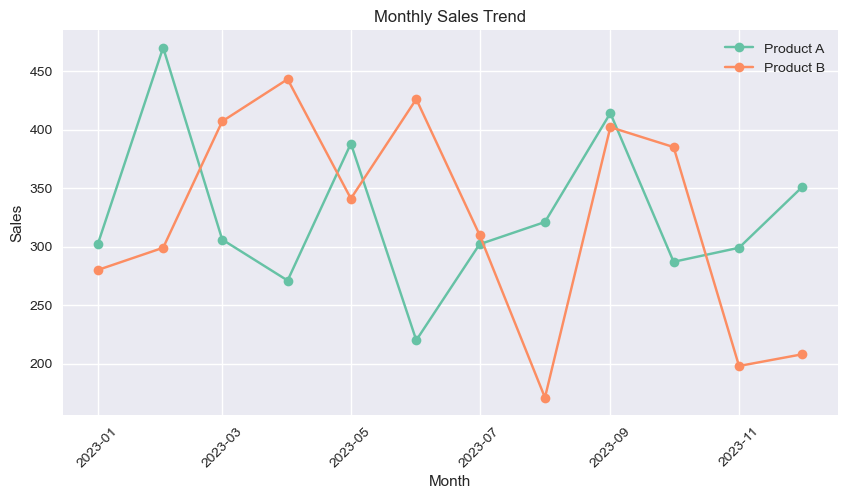

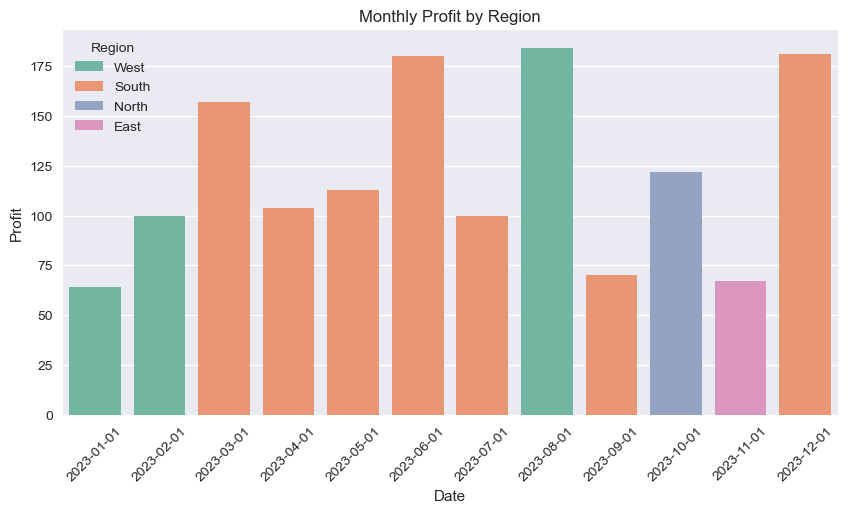

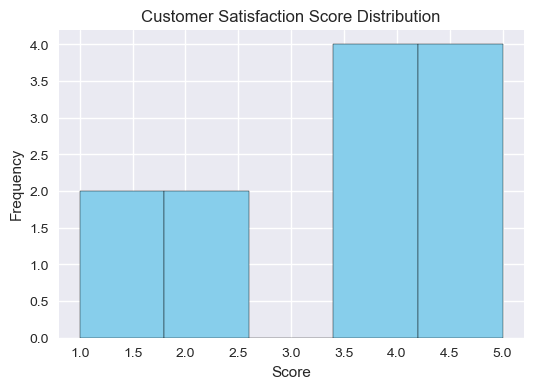

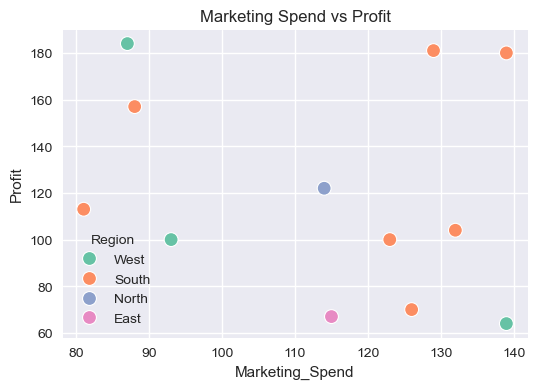

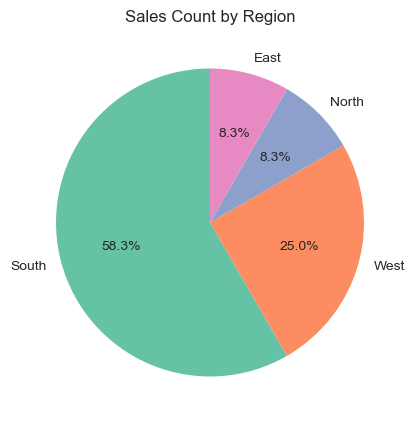

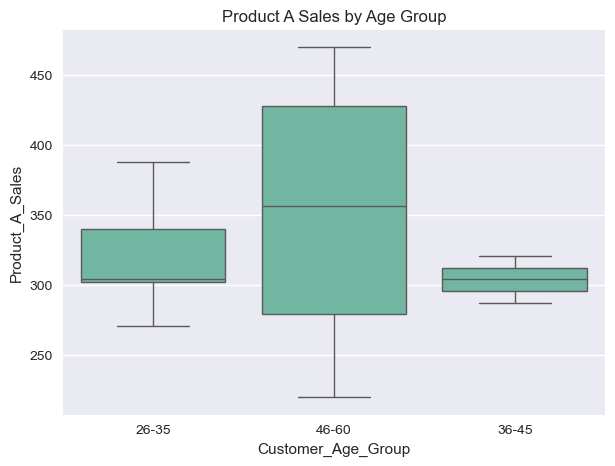

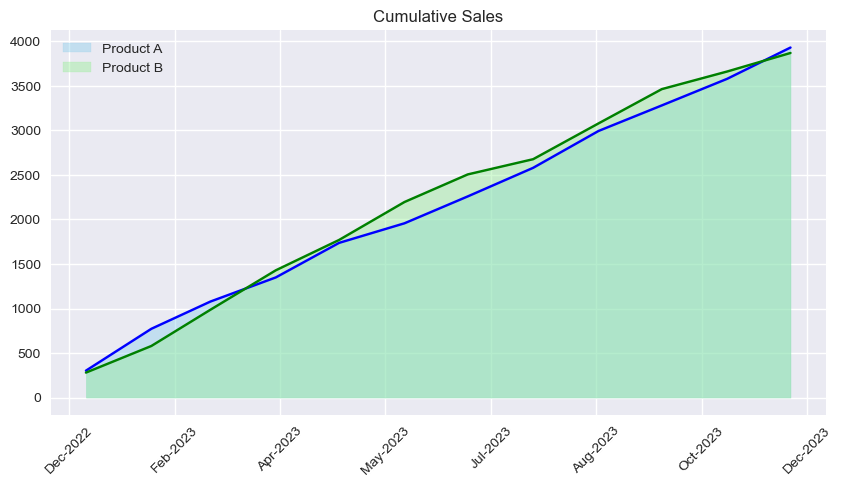

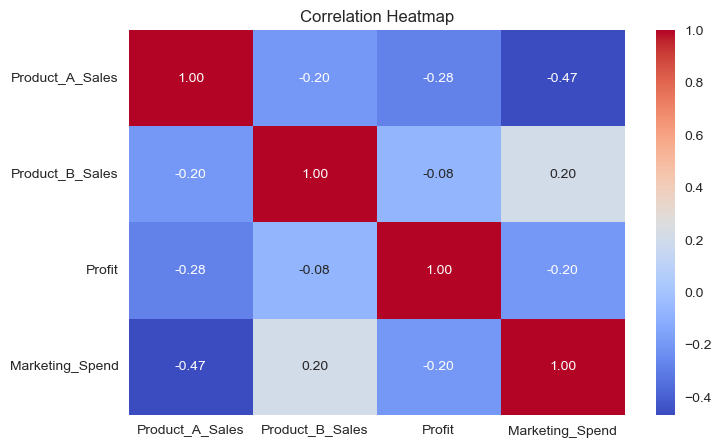

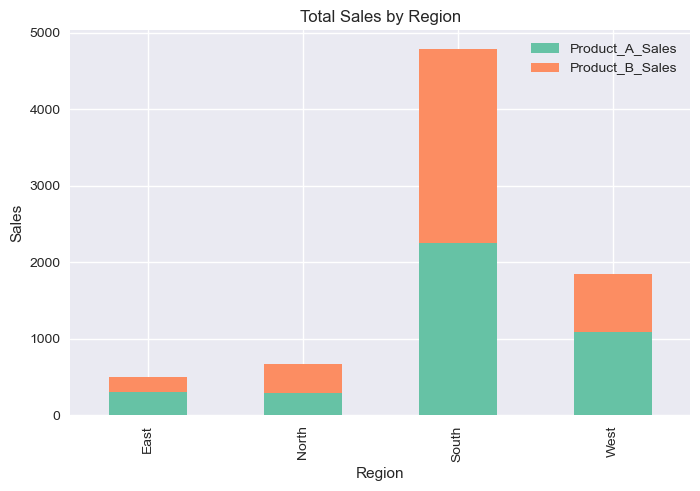

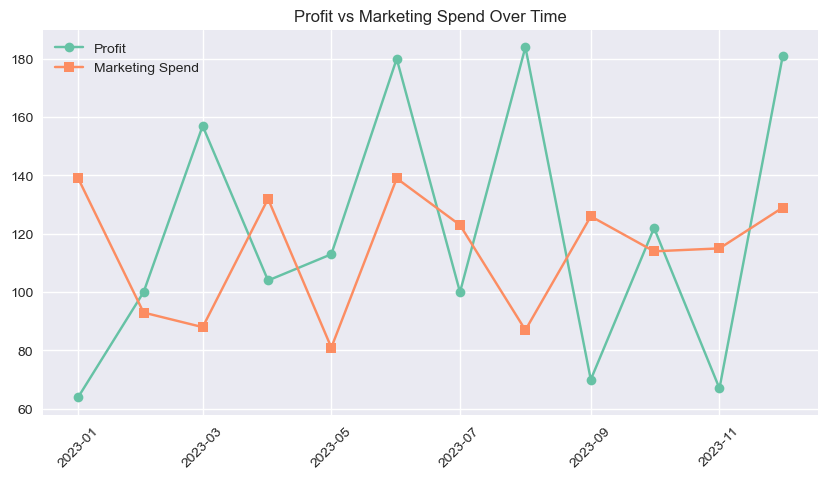

In [3]:

#  Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Better style
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")


#  Step 2: Create Sample Dataset
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

data = pd.DataFrame({
    'Date': dates,
    'Product_A_Sales': np.random.randint(200, 500, size=len(dates)),
    'Product_B_Sales': np.random.randint(150, 450, size=len(dates)),
    'Profit': np.random.randint(50, 200, size=len(dates)),
    'Marketing_Spend': np.random.randint(80, 150, size=len(dates)),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], size=len(dates)),
    'Customer_Age_Group': np.random.choice(['18-25', '26-35', '36-45', '46-60'], size=len(dates)),
    'Customer_Satisfaction_Score': np.random.randint(1, 6, size=len(dates))
})

data.to_csv("fresher_sales_data.csv", index=False)
print(" Dataset Created & Saved as fresher_sales_data.csv")
display(data.head())


# Step 3: 10 Must-Know Visualizations


#  Line Plot - Monthly Sales Trend
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Product_A_Sales'], marker='o', label='Product A')
plt.plot(data['Date'], data['Product_B_Sales'], marker='o', label='Product B')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.show()

#  Bar Plot - Monthly Profit by Region
plt.figure(figsize=(10,5))
sns.barplot(x='Date', y='Profit', hue='Region', data=data)
plt.title("Monthly Profit by Region")
plt.xticks(rotation=45)
plt.show()

#  Histogram - Customer Satisfaction
plt.figure(figsize=(6,4))
plt.hist(data['Customer_Satisfaction_Score'], bins=5, color='skyblue', edgecolor='black')
plt.title("Customer Satisfaction Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot - Marketing Spend vs Profit
plt.figure(figsize=(6,4))
sns.scatterplot(x='Marketing_Spend', y='Profit', hue='Region', data=data, s=100)
plt.title("Marketing Spend vs Profit")
plt.show()

# Pie Chart - Region Share
region_counts = data['Region'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Sales Count by Region")
plt.show()

#  Box Plot - Sales by Age Group
plt.figure(figsize=(7,5))
sns.boxplot(x='Customer_Age_Group', y='Product_A_Sales', data=data)
plt.title("Product A Sales by Age Group")
plt.show()

# Area Plot - Cumulative Sales (Fixed datetime issue)
dates_num = mdates.date2num(data['Date'])
plt.figure(figsize=(10,5))
plt.fill_between(dates_num, data['Product_A_Sales'].cumsum(), color="skyblue", alpha=0.4, label="Product A")
plt.fill_between(dates_num, data['Product_B_Sales'].cumsum(), color="lightgreen", alpha=0.4, label="Product B")
plt.plot(dates_num, data['Product_A_Sales'].cumsum(), color="blue")
plt.plot(dates_num, data['Product_B_Sales'].cumsum(), color="green")
plt.title("Cumulative Sales")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.xticks(rotation=45)
plt.show()

# Heatmap - Correlation
plt.figure(figsize=(8,5))
sns.heatmap(data[['Product_A_Sales', 'Product_B_Sales', 'Profit', 'Marketing_Spend']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Stacked Bar Plot - Sales by Region
sales_by_region = data.groupby('Region')[['Product_A_Sales','Product_B_Sales']].sum()
sales_by_region.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()

# Multiple Line Plot - Profit & Marketing Spend
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Profit'], label='Profit', marker='o')
plt.plot(data['Date'], data['Marketing_Spend'], label='Marketing Spend', marker='s')
plt.title("Profit vs Marketing Spend Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()
